In [389]:
from google.colab import drive 
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [390]:
import numpy as np
import pandas as pd
from statistics import mean
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
data_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ALS_TrainingData_2223.csv')
data_train

In [ ]:
pd.set_option("display.max_rows",data_train.shape[0]+1)
pd.set_option("display.max_rows",data_test.shape[0]+1)
data_train.isnull().sum()
data_test.isnull().sum()

**2.Perform summary and preliminary visualization.**



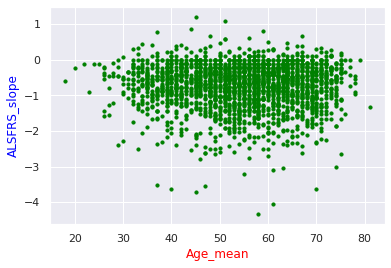

In [393]:
ALSFRS_slope_max=max(data_train['ALSFRS_slope'])
ALSFRS_slope_min =min(data_train['ALSFRS_slope'])
ALSFRS_slope_mean=mean(data_train['ALSFRS_slope'])
#creating scatter plot for leg median and ALSFRS_slope
plt.scatter(data_train['Age_mean'],data_train['ALSFRS_slope'], marker='o', color='green', s=10)
plt.xlabel('Age_mean', color='red',)
plt.ylabel('ALSFRS_slope', color='blue',)
plt.show()

In [ ]:
# Data standaraization 

scaled_data= StandardScaler().fit_transform(data_train)

# Turning standard to dataframe 
scaled_data_dframe = pd.DataFrame(scaled_data)
scaled_data_dframe.columns = [c for c in data_train.columns]

scaled_data_dframe.head()

In [ ]:
scaled_data_dframe.describe()

**3.Train a k-Means model on the data, experiment at least two different k values, and explain which k value is a better choice.**

In [396]:
#Applying k means clustering 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
kmeans.fit(scaled_data_dframe)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [397]:
print('SSE            : ', kmeans.inertia_)

SSE            :  207788.65254707955


In [398]:
# Determining the correleation between other features with ALSFRS_slope
correlation = pd.DataFrame(data_train.corrwith(data_train['ALSFRS_slope']), columns = ['correlation_score'])

In [399]:
print('features negatively correlated with ALSFRS_slope: ',correlation[correlation['correlation_score'] <= -0.3])

features negatively correlated with ALSFRS_slope:                      correlation_score
ALSFRS_Total_range          -0.819305
hands_range                 -0.632350
leg_range                   -0.584507
mouth_range                 -0.553194
onset_delta_mean            -0.324307
respiratory_range           -0.432878
trunk_range                 -0.686407


In [400]:
print('features positively correlated with ALSFRS_slope: ',(correlation[correlation['correlation_score'] >= 0.3]))

features positively correlated with ALSFRS_slope:                    correlation_score
ALSFRS_slope               1.000000
ALSFRS_Total_min           0.601810
hands_min                  0.424107
leg_min                    0.348967
mouth_min                  0.435538
respiratory_min            0.380749
trunk_min                  0.488530


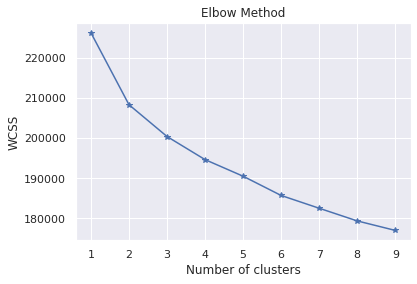

In [446]:
# by using elbow method i m trying to find how clusters we need
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data_dframe)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss,marker='*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [447]:

from kneed import KneeLocator
kl = KneeLocator(range(1, 10), wcss, curve="convex", direction="decreasing")

kl.elbow

3

In [448]:
#silhouette_score (sklearn.metrics) for the data set is used for measuring the mean of the Silhouette Coefficient for each sample belonging to different clusters.
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data_dframe, kmeans.labels_, metric='euclidean')
score

0.042930858395988855

In [449]:
# silhouette coefficients 
silhouette_coeffs=[]
for k in range (2,11):
  kmeans_k = KMeans (n_clusters = k)
  kmeans_k.fit(scaled_data_dframe)
  silhouette_coeffs_score = silhouette_score(scaled_data_dframe,kmeans_k.labels_ )
  silhouette_coeffs.append (silhouette_coeffs_score)
 

In [450]:
silhouette_coeffs_score

0.04517503556714029

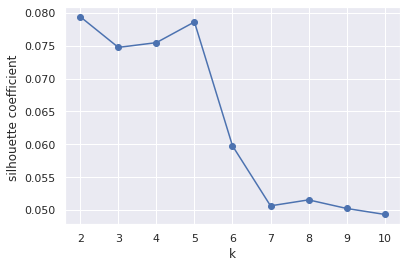

In [442]:
 #Visualize the silhoutte efficient for each k
x=[i for i in range (2,11)]
y=silhouette_coeffs
plt.plot(x, y, marker='o')
plt.xticks(x)
plt.xlabel('k')
plt.ylabel('silhouette coefficient ')
plt.show()

In [406]:
# choosing different K values , K=2

'''X_std = StandardScaler().fit_transform(data_train)

# Run local implementation of kmeans
km = KMeans(n_clusters=2, max_iter=300)
km.fit(X_std)
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels_ == 0, 1], X_std[km.labels_ == 0, 6],c='green', label='cluster 1',s=75)
plt.scatter(X_std[km.labels_ == 1, 1], X_std[km.labels_ == 1, 6],c='blue', label='cluster 2',s=90)

plt.scatter(centroids[:, 1], centroids[:, 6], marker='*',c='r', s=100,label='centroid')
plt.legend()
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');'''

"X_std = StandardScaler().fit_transform(data_train)\n\n# Run local implementation of kmeans\nkm = KMeans(n_clusters=2, max_iter=300)\nkm.fit(X_std)\ncentroids = km.cluster_centers_\n\n# Plot the clustered data\nfig, ax = plt.subplots(figsize=(10, 10))\nplt.scatter(X_std[km.labels_ == 0, 1], X_std[km.labels_ == 0, 6],c='green', label='cluster 1',s=75)\nplt.scatter(X_std[km.labels_ == 1, 1], X_std[km.labels_ == 1, 6],c='blue', label='cluster 2',s=90)\n\nplt.scatter(centroids[:, 1], centroids[:, 6], marker='*',c='r', s=100,label='centroid')\nplt.legend()\nplt.xlim([-4, 4])\nplt.ylim([-4, 4])\nplt.xlabel('Eruption time in mins')\nplt.ylabel('Waiting time to next eruption')\nplt.title('Visualization of clustered data', fontweight='bold')\nax.set_aspect('equal');"

In [407]:
# choosing different K values , K=3

'''X_std = StandardScaler().fit_transform(data_train)

# Run local implementation of kmeans
km = KMeans(n_clusters=3, max_iter=300)
km.fit(X_std)
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_std[km.labels_ == 0, 1], X_std[km.labels_ == 0, 6],c='green', label='cluster 1',s=75)
plt.scatter(X_std[km.labels_ == 1, 1], X_std[km.labels_ == 1, 6],c='blue', label='cluster 2',s=150)
plt.scatter(X_std[km.labels_ == 2, 1], X_std[km.labels_ == 2, 6],c='red', label='cluster 1',s=20)

plt.scatter(centroids[:, 1], centroids[:, 6], marker='*',c='yellow', s=200,label='centroid')
plt.legend()
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');'''

"X_std = StandardScaler().fit_transform(data_train)\n\n# Run local implementation of kmeans\nkm = KMeans(n_clusters=3, max_iter=300)\nkm.fit(X_std)\ncentroids = km.cluster_centers_\n\n# Plot the clustered data\nfig, ax = plt.subplots(figsize=(10, 10))\nplt.scatter(X_std[km.labels_ == 0, 1], X_std[km.labels_ == 0, 6],c='green', label='cluster 1',s=75)\nplt.scatter(X_std[km.labels_ == 1, 1], X_std[km.labels_ == 1, 6],c='blue', label='cluster 2',s=150)\nplt.scatter(X_std[km.labels_ == 2, 1], X_std[km.labels_ == 2, 6],c='red', label='cluster 1',s=20)\n\nplt.scatter(centroids[:, 1], centroids[:, 6], marker='*',c='yellow', s=200,label='centroid')\nplt.legend()\nplt.xlim([-4, 4])\nplt.ylim([-4, 4])\nplt.xlabel('Eruption time in mins')\nplt.ylabel('Waiting time to next eruption')\nplt.title('Visualization of clustered data', fontweight='bold')\nax.set_aspect('equal');"

In [408]:
kmeans_k3_cluster = KMeans (n_clusters = 3, init='k-means++', max_iter=100, n_init=10, random_state=0)
kmeans_k3_cluster.fit(scaled_data_dframe)

# print the SSE of the model
print ('SSE of the final model: {:.2f}'.format(kmeans_k3_cluster.inertia_))

# apply the model to cluster the dataset
pred = kmeans_k3_cluster.predict(scaled_data_dframe)

pred

SSE of the final model: 200401.18


array([0, 0, 2, ..., 2, 0, 1], dtype=int32)

In [444]:
#To know the number of items in the each cluster
scaled_data_dframe['Clusters'] = pred
scaled_data_dframe['Clusters'].value_counts()

0    982
2    740
1    501
Name: Clusters, dtype: int64

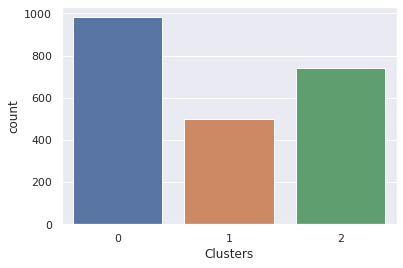

In [410]:
#Visualizing the cluster items
sns.countplot(x='Clusters', data=scaled_data_dframe)
plt.show()

In [ ]:
# Print centroids of clusters
centroids  = kmeans_k3_cluster.cluster_centers_
centroids

In [416]:
scaled_data_dframe.shape

(2223, 102)

In [423]:
#converting centriod values into a dataframe
scaled_data_dframe.drop('Clusters', axis=1, inplace=True)
centroids_dfarme = pd.DataFrame(centroids, columns = scaled_data_dframe.columns )
centroids_dfarme

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,0.047384,0.008468,0.103323,0.158494,0.213068,-0.208997,0.528434,0.661854,0.781536,0.872137,-0.624385,-0.001622,0.097902,0.160183,-0.108534,0.058320,0.166944,0.210370,-0.063118,0.022161,0.077536,0.062644,-0.175803,0.058935,0.133093,0.165189,-0.176408,-0.029893,0.032499,0.049982,-0.161982,0.007631,0.056138,0.107281,-0.189738,-0.056075,-0.107880,-0.044235,-0.090601,0.085066,...,0.118306,0.173026,-0.232807,0.358769,0.472792,0.612892,-0.334074,0.302876,0.385960,0.512750,-0.534087,-0.003058,0.096414,-0.183774,-0.139614,-0.083063,0.021705,0.080151,0.085180,-0.078323,-0.268178,-0.228478,-0.170571,-0.239328,0.168383,0.336812,0.459343,-0.440670,0.038958,0.046299,0.085803,-0.201050,0.047033,0.567595,0.676893,0.794466,-0.510567,-0.102793,-0.055972,-0.024281
1,-0.031509,0.305580,-0.145493,-0.227014,-0.291801,0.422555,-1.084147,0.092851,-0.225890,-0.761617,1.223226,0.054930,-0.090101,-0.100152,0.257072,-0.008373,-0.045061,-0.040812,0.192248,0.338320,0.348662,0.321181,0.518957,0.075445,0.101018,0.076538,0.416799,-0.092851,-0.102445,-0.088722,0.332250,0.037405,-0.026951,-0.089208,0.471110,-0.054385,-0.043098,0.027077,0.143244,-0.315030,...,-0.231997,-0.266362,0.435827,0.316387,0.085868,-0.311259,0.930442,-0.666341,-0.745555,-0.927156,0.942299,0.482789,-0.581609,0.313764,0.172323,0.130690,0.059556,0.111342,0.058599,0.250501,0.396450,0.318219,0.252202,0.554655,-0.267021,-0.440693,-0.691246,0.724487,-0.111127,-0.114131,-0.156603,0.499770,-0.032080,0.327751,0.111553,-0.380915,0.992818,0.115260,0.127669,-0.015040
2,-0.041547,-0.218123,-0.038610,-0.056632,-0.085189,-0.008737,0.032752,-0.941160,-0.884185,-0.641714,0.000418,-0.035036,-0.068918,-0.144761,-0.030017,-0.071723,-0.191032,-0.251535,-0.046397,-0.258460,-0.338947,-0.300579,-0.118053,-0.129287,-0.245011,-0.271029,-0.048085,0.102531,0.026231,-0.006261,-0.009988,-0.035451,-0.056250,-0.081969,-0.067166,0.111233,0.172338,0.040369,0.023250,0.100400,...,0.000073,-0.049275,0.013875,-0.690299,-0.685543,-0.602593,-0.186610,0.049206,-0.007419,-0.052724,0.070786,-0.322803,0.265820,0.031446,0.068605,0.021746,-0.069124,-0.181745,-0.152710,-0.065660,0.087471,0.087754,0.055605,-0.057922,-0.042668,-0.148597,-0.141568,0.094285,0.023537,0.015830,-0.007838,-0.071558,-0.040695,-0.975111,-0.973779,-0.796388,0.005372,0.058375,-0.012159,0.042404


In [425]:
scaled_data_dframe['Clusters'] = pred
scaled_data_dframe['Clusters'].value_counts()

0    982
2    740
1    501
Name: Clusters, dtype: int64

In [ ]:
#visualizing the centriod values with few features in the data set 

few_features= ['mouth_range', 'pulse_range', 'leg_range','respiratory_range', 'trunk_min', 'Age_mean']

fig, ax = plt.subplots(6,1,figsize=(10,75))
for i,y in enumerate(few_features):
  sns.scatterplot ( 'ALSFRS_slope',y, hue = 'Clusters',palette='hls' ,data = scaled_data_dframe, ax=ax[i])
  sns.scatterplot (  'ALSFRS_slope' , y,   color='.3', s = 100, marker="*",label = 'centroid', data = centroids_dfarme, ax=ax[i])
  

**Model evaluation with testing data**

In [428]:
data_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ALS_TestingData_78.csv')
data_test.shape

(78, 131)

In [ ]:
data_test.isnull().sum()

In [ ]:
data_test.describe()

In [431]:
# Data standaraization the test data

scaled_test_data= StandardScaler().fit_transform(data_test)

# Turning standard to dataframe 
scaled_test_dframe = pd.DataFrame(scaled_test_data)
scaled_test_dframe.columns = [c for c in data_test.columns]
scaled_test_dframe.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Basophils_max,Basophils_median,Basophils_min,Basophils_range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Bilirubin..total._max,Bilirubin..total._median,Bilirubin..total._min,Bilirubin..total._range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,BMI_max,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,...,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,Red.Blood.Cells..RBC._max,Red.Blood.Cells..RBC._median,Red.Blood.Cells..RBC._min,Red.Blood.Cells..RBC._range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,-1.717812,0.945850,0.244852,0.596349,1.034793,0.587818,-1.458910,0.526079,-1.851243,-1.341512,0.024737,0.988218,-0.434457,-0.033636,3.342091,0.735391,-0.523946,-0.014417,2.938099,-0.948815,-0.835895,-0.094050,0.259338,-0.337896,0.233431,0.798241,1.294372,-0.570797,-0.346779,-0.970983,0.704731,0.084951,0.889771,1.166592,1.012854,0.839960,0.050251,-0.570858,0.199303,3.420706,...,-1.006563,-0.402466,-0.465062,-1.410562,-0.471302,-0.118567,0.193570,-0.901443,0.142804,0.498807,0.809669,-0.438835,-0.180207,-0.445870,3.425035,-0.874717,-0.206776,0.223197,0.027270,0.361158,-2.39877,-1.273404,0.000637,-1.919383,-1.540062,-0.230618,0.085914,-1.787192,0.637377,-1.415480,-0.851721,-0.175258,-0.860781,-0.338062,0.957082,-0.093814,-0.264257,0.532693,0.873580,0.269658
1,-1.682459,-0.193890,-2.060136,-2.015032,-1.495422,-0.273925,-0.815078,0.361283,0.162818,-0.074453,0.765499,-0.351815,0.210699,-0.127337,-0.369064,0.020715,0.443975,-0.175064,-0.166483,-0.418295,0.119414,-0.094050,-0.420587,-0.447865,0.233431,-0.082421,-0.499186,1.172846,0.429503,-0.087756,0.205158,-0.950541,-0.958462,-0.627765,-0.634048,0.685970,1.779469,2.186226,1.024736,0.287992,...,1.128202,-0.959416,0.873475,1.230010,0.474251,-0.195893,-0.645233,-0.114362,0.142804,0.101797,-0.430922,0.591720,0.125361,0.396501,0.049236,1.722193,1.037000,0.844074,0.202938,0.361158,0.79959,0.739951,-0.485982,0.369789,0.156617,-1.258514,0.421791,-1.765746,0.159344,-0.213221,-0.851721,1.509194,-0.860781,-1.217022,-1.238577,-0.267295,-0.445725,-0.101111,-0.210106,-0.375913
2,-1.647105,0.035316,0.244852,0.269926,0.022707,-0.526281,0.640669,-2.440247,-1.291782,-1.341512,-0.754729,-0.497470,-0.706102,-1.064347,-0.465540,-0.352159,-0.739040,-1.138948,-0.440694,-0.153035,0.119414,0.884069,-0.647939,-0.337896,-0.223473,-0.522752,-0.738104,-1.268254,-1.588829,-1.412596,-0.503305,0.226155,-0.232370,-1.017843,-0.336651,-0.868814,-0.641437,-1.053347,-0.350985,-0.859650,...,-1.006563,0.660773,-2.021284,-0.530371,1.010916,1.675402,1.815255,1.459799,1.535143,0.101797,-0.268618,1.990330,2.518974,0.637178,-0.133013,0.140439,-0.341969,-0.422515,-0.342339,0.361158,0.79959,-1.273404,0.522282,-1.003714,-0.861391,-0.744566,-0.887453,-1.759064,-2.708854,-1.415480,-0.851721,-1.803831,0.631239,0.980379,0.957082,-0.229130,-0.151267,0.221770,-0.183512,-0.464279
3,-1.611752,1.588363,1.561988,0.106715,0.528750,5.702402,0.685649,0.690875,0.274710,0.664665,0.373247,1.454316,0.482343,-0.221038,5.713213,1.077192,1.411897,0.306877,4.693156,-0.816185,0.119414,-0.094050,0.924573,-0.337896,0.690334,1.678903,0.221461,-0.570797,-0.967804,-0.970983,1.044945,-0.103320,-0.364387,-0.237687,3.42

In [432]:
#Applying the model for the test data
kmeans_test_cluster = KMeans (n_clusters = 3, init='k-means++', max_iter=100, n_init=10, random_state=0)
kmeans_test_cluster.fit(scaled_test_dframe)

# print the SSE of the model
print ('SSE::::::::::::::::::::::::::::::::',(kmeans_test_cluster.inertia_))

# apply the model to cluster the dataset
pred_test = kmeans_test_cluster.predict(scaled_test_dframe)
pred_test

SSE:::::::::::::::::::::::::::::::: 8735.029375726323


array([2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2], dtype=int32)

In [433]:
scaled_test_dframe['Clusters'] = pred_test
scaled_test_dframe['Clusters'].value_counts()

2    42
1    35
0     1
Name: Clusters, dtype: int64

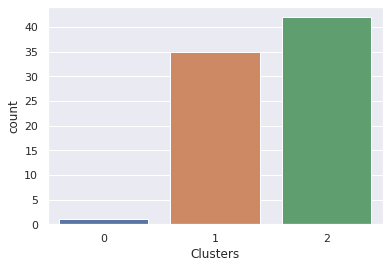

In [434]:
#Visualizing the cluster items
sns.countplot(x='Clusters', data=scaled_test_dframe)
plt.show()

In [ ]:
# Print centroids of clusters
centroids_test  = kmeans_test_cluster.cluster_centers_
centroids_test

In [456]:
#converting centriod values into a dataframe
#scaled_test_dframe.drop('Clusters', axis=1, inplace=True)
centroids_test_dfarme = pd.DataFrame(centroids_test, columns = scaled_test_dframe.columns)
centroids_test_dfarme.ALSFRS_slope

0   -0.124221
1    0.239391
2   -0.196535
Name: ALSFRS_slope, dtype: float64